In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [4]:
import warnings
import io
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [6]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [7]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,-1,0,unknown,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,-1,0,unknown,yes
39997,54,admin.,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,-1,0,unknown,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,90,7,other,no


In [8]:
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,57,retired,married,secondary,no,718,no,no,cellular,3,jun,170,1,-1,0,unknown
1,50,management,married,secondary,no,268,no,no,cellular,3,jun,74,2,90,2,failure
2,46,technician,single,secondary,no,4367,yes,no,cellular,3,jun,65,1,96,1,failure
3,56,admin.,married,secondary,no,3554,no,no,cellular,3,jun,151,1,-1,0,unknown
4,32,services,single,tertiary,no,785,no,no,cellular,3,jun,273,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
5207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
5208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
5209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [9]:
print(train.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [10]:
print(test.head())

   age         job  marital  education default  balance housing loan  \
0   57     retired  married  secondary      no      718      no   no   
1   50  management  married  secondary      no      268      no   no   
2   46  technician   single  secondary      no     4367     yes   no   
3   56      admin.  married  secondary      no     3554      no   no   
4   32    services   single   tertiary      no      785      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  
0  cellular    3   jun       170         1     -1         0  unknown  
1  cellular    3   jun        74         2     90         2  failure  
2  cellular    3   jun        65         1     96         1  failure  
3  cellular    3   jun       151         1     -1         0  unknown  
4  cellular    3   jun       273         1     -1         0  unknown  


In [11]:
print(train.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [12]:
data = pd.read_csv('train.csv')

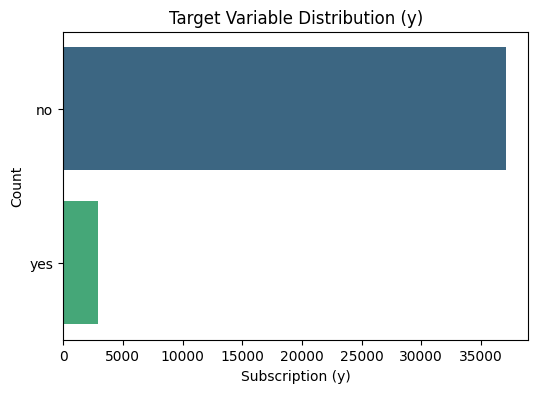

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data['y'], palette='viridis')
plt.title('Target Variable Distribution (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Count')
plt.show()

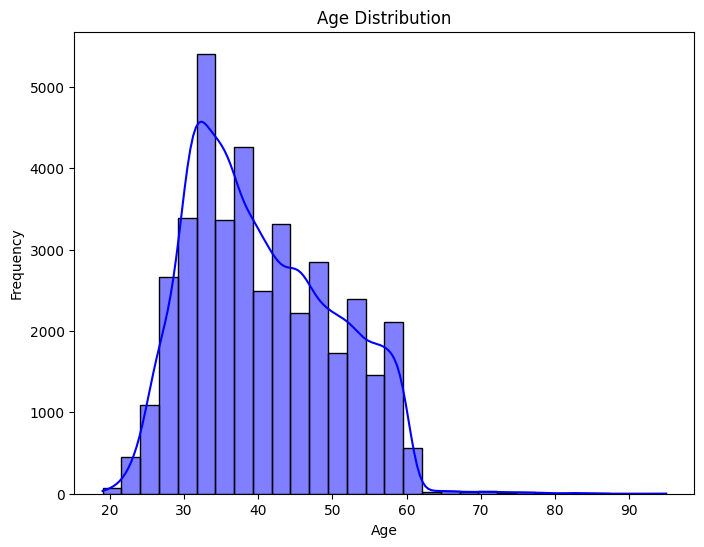

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

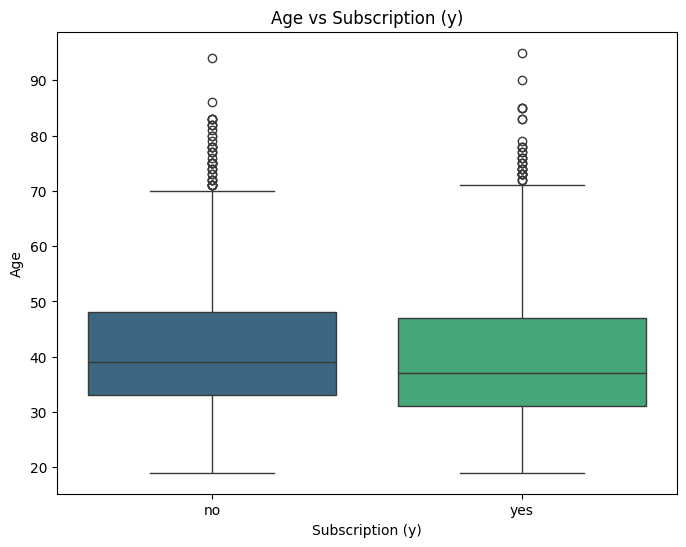

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age',data=data , palette='viridis')
plt.title('Age vs Subscription (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Age')
plt.show()

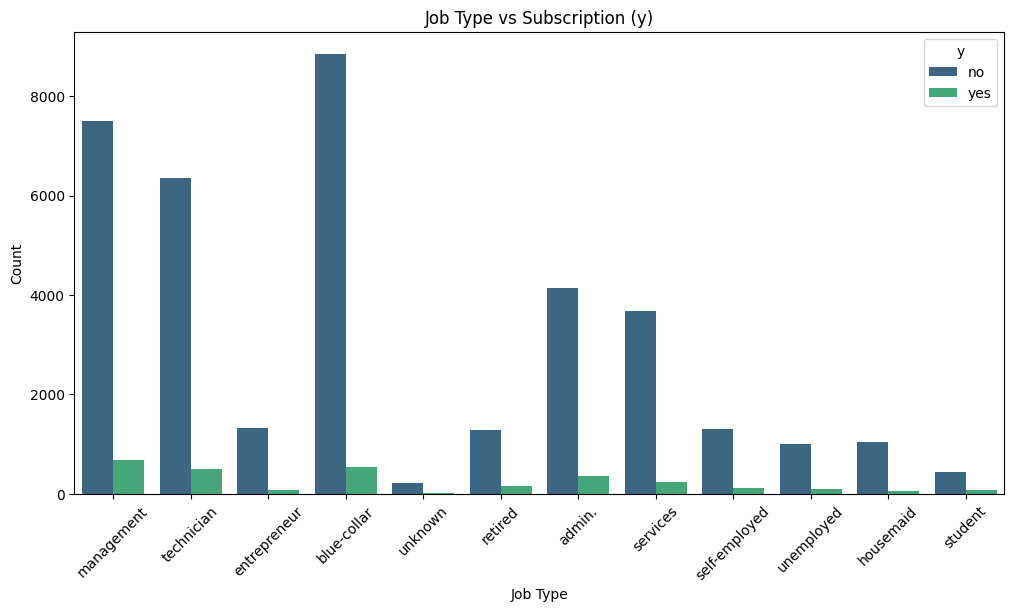

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=data, palette='viridis')
plt.title('Job Type vs Subscription (y)')
plt.xticks(rotation=45)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

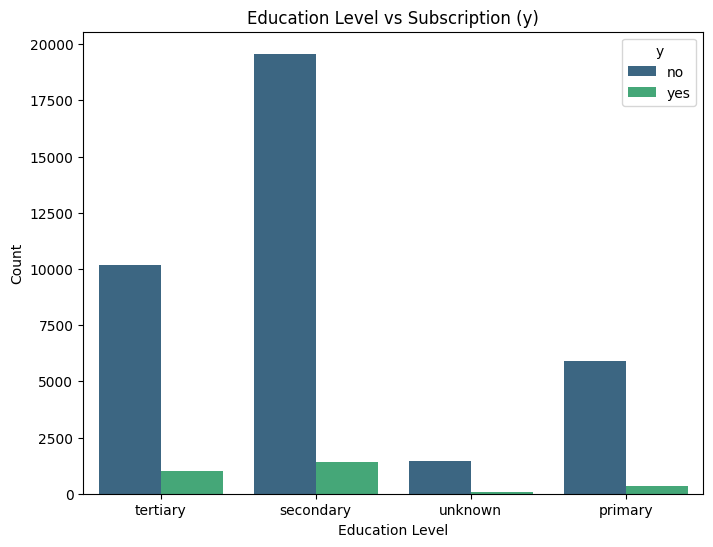

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='y', data=data, palette='viridis')
plt.title('Education Level vs Subscription (y)')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

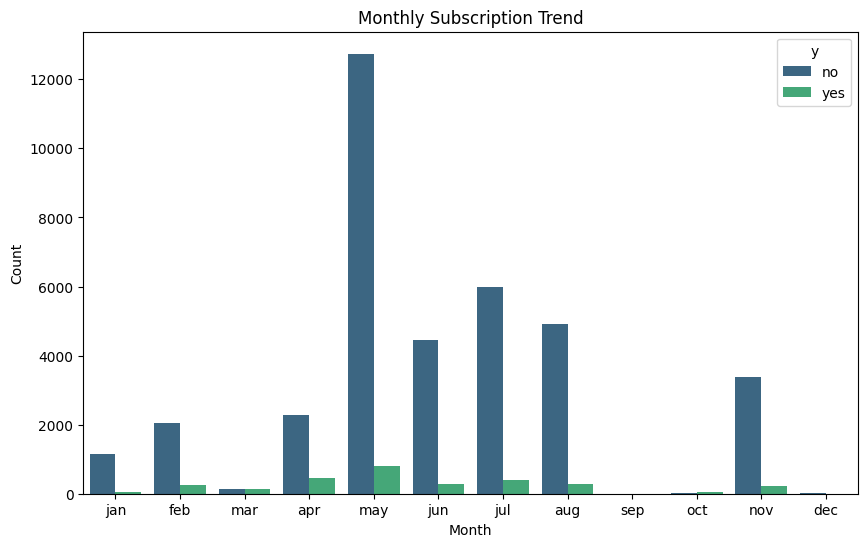

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='y', data=data, palette='viridis', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Monthly Subscription Trend')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


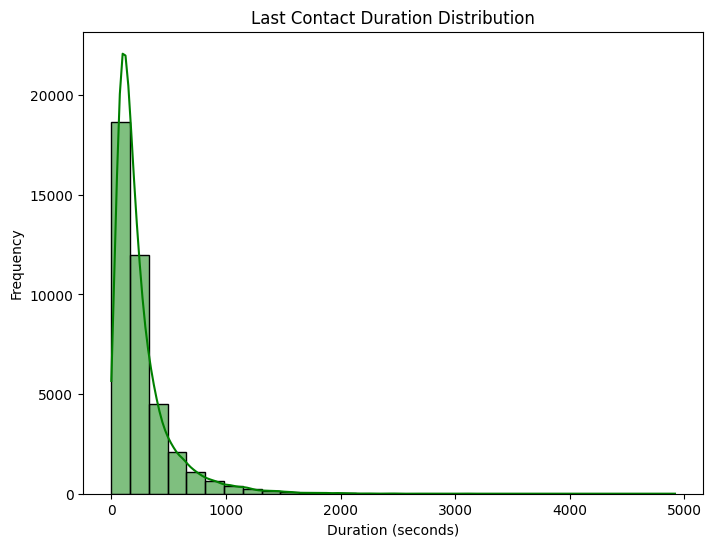

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data['duration'], bins=30, kde=True, color='green')
plt.title('Last Contact Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

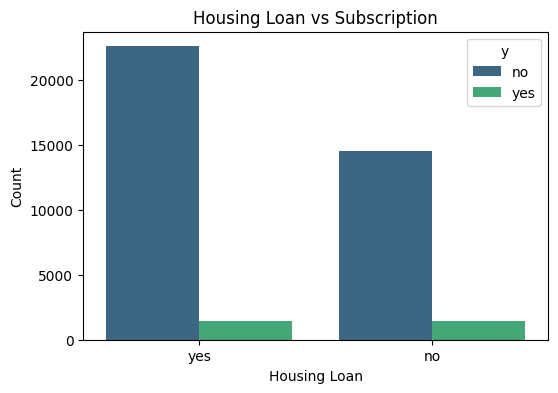

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='housing', hue='y', data=data, palette='viridis')
plt.title('Housing Loan vs Subscription')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

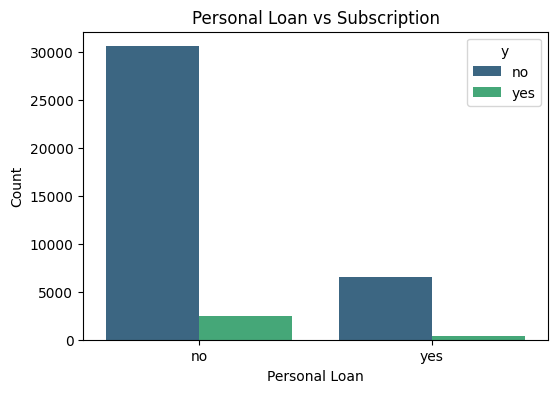

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='loan', hue='y', data=data, palette='viridis')
plt.title('Personal Loan vs Subscription')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()

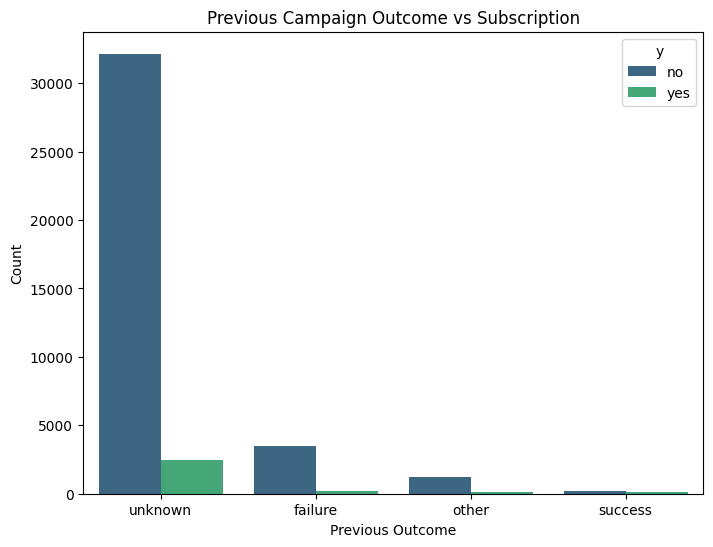

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='poutcome', hue='y', data=data, palette='viridis')
plt.title('Previous Campaign Outcome vs Subscription')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.show()

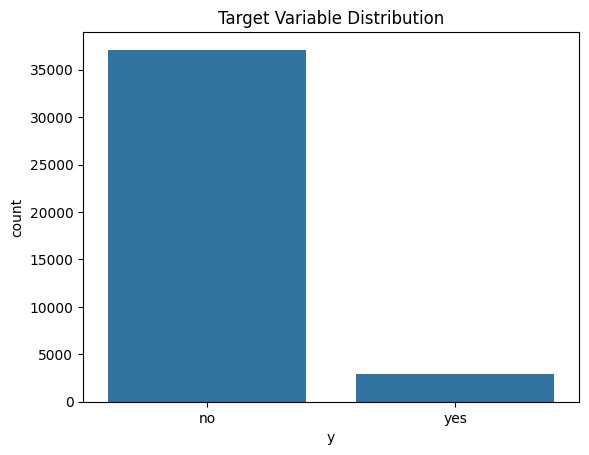

In [23]:
sns.countplot(data=train, x='y')
plt.title("Target Variable Distribution")
plt.show()

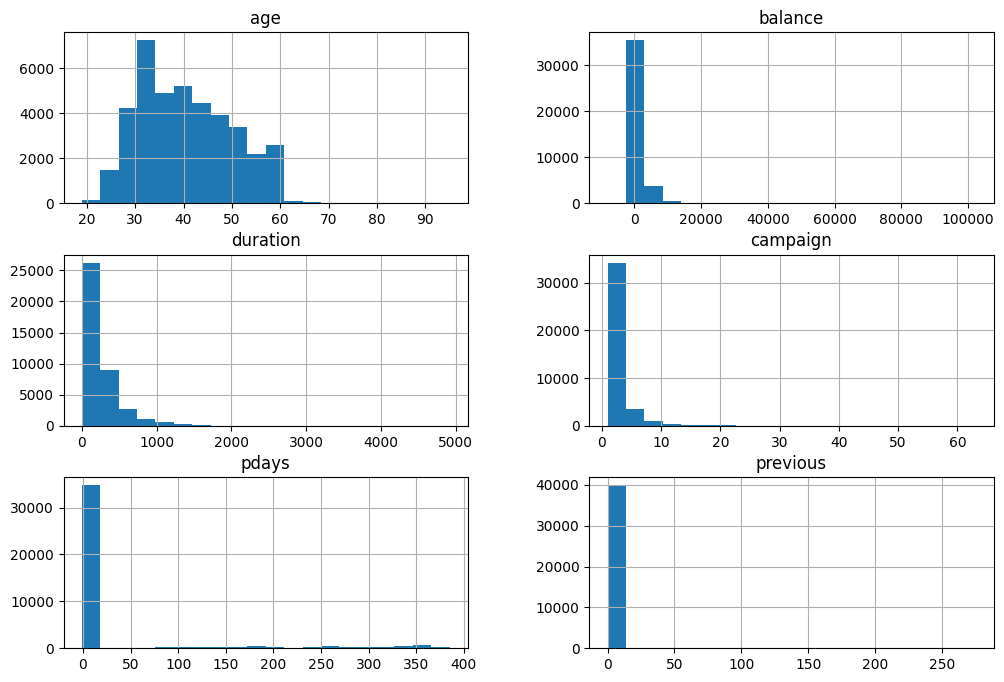

In [24]:
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
train[numerical_features].hist(figsize=(12, 8), bins=20)
plt.show()

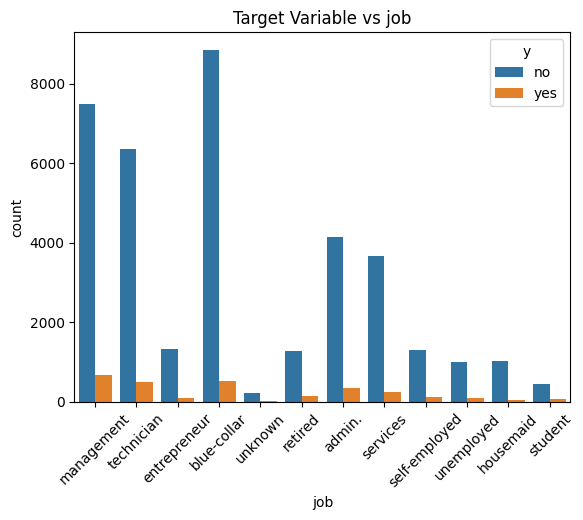

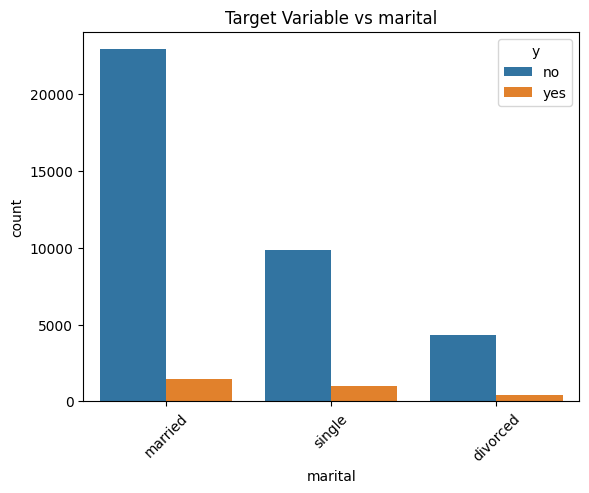

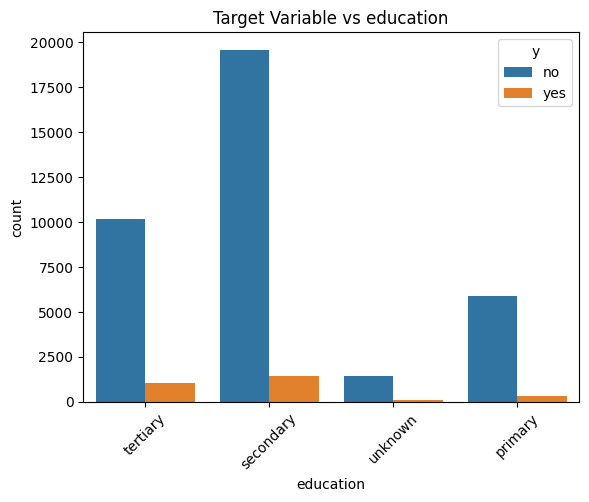

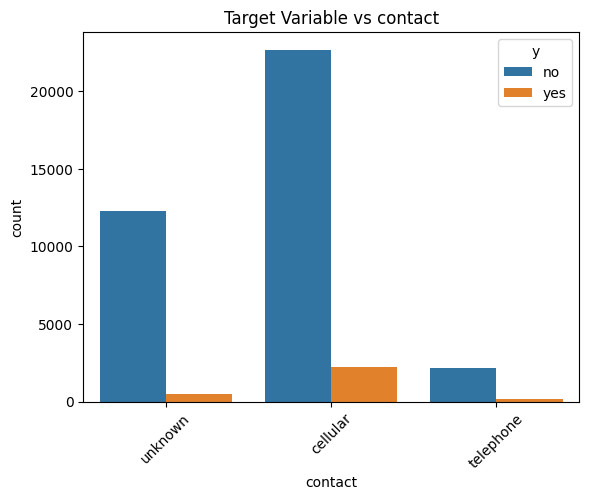

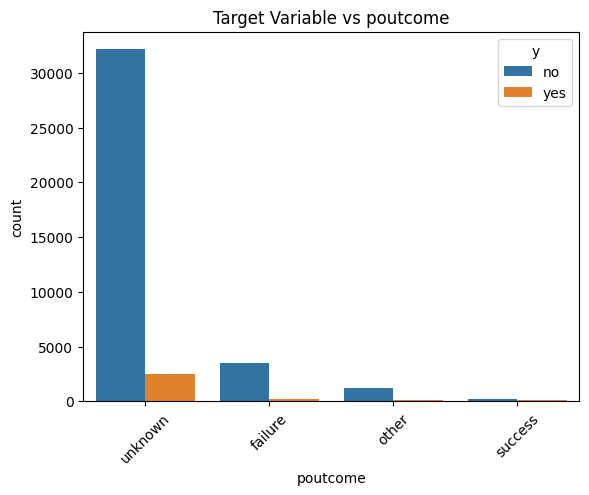

In [25]:
categorical_features = ['job', 'marital', 'education', 'contact', 'poutcome']
for feature in categorical_features:
    sns.countplot(data=train, x=feature, hue='y')
    plt.title(f"Target Variable vs {feature}")
    plt.xticks(rotation=45)
    plt.show()

In [26]:
# Assuming 'train' and 'test' DataFrames are already loaded

# Concatenate train and test DataFrames vertically
combined = pd.concat([train, test], ignore_index=True)

print("Available columns in combined DataFrame:")
print(combined.columns)

Available columns in combined DataFrame:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [27]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'poutcome']

In [28]:
categorical_cols = [col for col in categorical_cols if col in combined.columns]
print(f"Filtered categorical columns: {categorical_cols}")

Filtered categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [29]:
combined = pd.get_dummies(combined, columns=categorical_cols, drop_first=True)

In [30]:
combined

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,no,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,no,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,NaN,False,False,...,False,False,False,False,True,False,False,False,False,True
45207,71,1729,17,456,2,-1,0,NaN,False,False,...,False,False,False,False,True,False,False,False,False,True
45208,72,5715,17,1127,5,184,3,NaN,False,False,...,False,False,False,False,True,False,False,False,True,False
45209,57,668,17,508,4,-1,0,NaN,True,False,...,False,False,False,False,True,False,False,False,False,True


In [31]:
train = combined.iloc[:len(train), :]
test = combined.iloc[len(train):, :]

In [32]:
train

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,no,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,no,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,107,1,-1,0,no,False,False,...,False,True,False,False,False,False,False,False,False,True
39996,30,3340,3,238,3,-1,0,yes,False,False,...,False,True,False,False,False,False,False,False,False,True
39997,54,200,3,170,1,-1,0,yes,False,False,...,False,True,False,False,False,False,False,False,False,True
39998,34,1047,3,342,1,90,7,no,False,False,...,False,True,False,False,False,False,False,True,False,False


In [33]:
test

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
40000,57,718,3,170,1,-1,0,NaN,False,False,...,False,True,False,False,False,False,False,False,False,True
40001,50,268,3,74,2,90,2,NaN,False,False,...,False,True,False,False,False,False,False,False,False,False
40002,46,4367,3,65,1,96,1,NaN,False,False,...,False,True,False,False,False,False,False,False,False,False
40003,56,3554,3,151,1,-1,0,NaN,False,False,...,False,True,False,False,False,False,False,False,False,True
40004,32,785,3,273,1,-1,0,NaN,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,NaN,False,False,...,False,False,False,False,True,False,False,False,False,True
45207,71,1729,17,456,2,-1,0,NaN,False,False,...,False,False,False,False,True,False,False,False,False,True
45208,72,5715,17,1127,5,184,3,NaN,False,False,...,False,False,False,False,True,False,False,False,True,False
45209,57,668,17,508,4,-1,0,NaN,True,False,...,False,False,False,False,True,False,False,False,False,True


In [34]:
train['y'] = train['y'].map({'yes': 1, 'no': 0})

In [35]:
train['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
39995,0
39996,1
39997,1
39998,0


In [36]:
scaler = StandardScaler()
scaled_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [37]:
train[scaled_features] = scaler.fit_transform(train[scaled_features])
test[scaled_features] = scaler.transform(test[scaled_features])

In [38]:
train[scaled_features]

,age,balance,duration,campaign,pdays,previous
0,1.810415,0.299174,0.023811,-0.581096,-0.361914,-0.194562
1,0.358382,-0.428854,-0.400305,-0.581096,-0.361914,-0.194562
2,-0.782501,-0.438152,-0.689474,-0.581096,-0.361914,-0.194562
3,0.669532,0.079802,-0.627785,-0.581096,-0.361914,-0.194562
4,-0.782501,-0.438497,-0.219092,-0.581096,-0.361914,-0.194562
...,...,...,...,...,...,...
39995,1.291832,-0.302809,-0.569951,-0.581096,-0.361914,-0.194562
39996,-1.093650,0.711402,-0.064868,0.036377,-0.361914,-0.194562
39997,1.395549,-0.369964,-0.327048,-0.581096,-0.361914,-0.194562
39998,-0.678784,-0.078271,0.336114,-0.581096,0.637422,3.067166


In [39]:
test[scaled_features]

,age,balance,duration,campaign,pdays,previous
40000,1.706699,-0.191573,-0.327048,-0.581096,-0.361914,-0.194562
40001,0.980682,-0.346546,-0.697185,-0.272359,0.637422,0.737360
40002,0.565816,1.065085,-0.731886,-0.581096,0.703312,0.271399
40003,1.602982,0.785100,-0.400305,-0.581096,-0.361914,-0.194562
40004,-0.886217,-0.168499,0.070078,-0.581096,-0.361914,-0.194562
...,...,...,...,...,...,...
45206,1.084399,-0.154724,2.784418,0.036377,-0.361914,-0.194562
45207,3.158732,0.156599,0.775652,-0.272359,-0.361914,-0.194562
45208,3.262448,1.529315,3.362757,0.653849,1.669703,1.203321
45209,1.706699,-0.208792,0.976143,0.345113,-0.361914,-0.194562


In [40]:
X = train.drop(columns=['y'])
y = train['y']

In [41]:
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.810415,0.299174,5,0.023811,-0.581096,-0.361914,-0.194562,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0.358382,-0.428854,5,-0.400305,-0.581096,-0.361914,-0.194562,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,-0.782501,-0.438152,5,-0.689474,-0.581096,-0.361914,-0.194562,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,0.669532,0.079802,5,-0.627785,-0.581096,-0.361914,-0.194562,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,-0.782501,-0.438497,5,-0.219092,-0.581096,-0.361914,-0.194562,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.291832,-0.302809,3,-0.569951,-0.581096,-0.361914,-0.194562,False,False,False,...,False,True,False,False,False,False,False,False,False,True
39996,-1.093650,0.711402,3,-0.064868,0.036377,-0.361914,-0.194562,False,False,False,...,False,True,False,False,False,False,False,False,False,True
39997,1.395549,-0.369964,3,-0.327048,-0.581096,-0.361914,-0.194562,False,False,False,...,False,True,False,False,False,False,False,False,False,True
39998,-0.678784,-0.078271,3,0.336114,-0.581096,0.637422,3.067166,False,False,False,...,False,True,False,False,False,False,False,True,False,False


In [42]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
39995,0
39996,1
39997,1
39998,0


In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

In [45]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [46]:
y_pred = model.predict(X_val)

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7424
           1       0.64      0.06      0.11       576

    accuracy                           0.93      8000
   macro avg       0.79      0.53      0.54      8000
weighted avg       0.91      0.93      0.90      8000

Confusion Matrix:


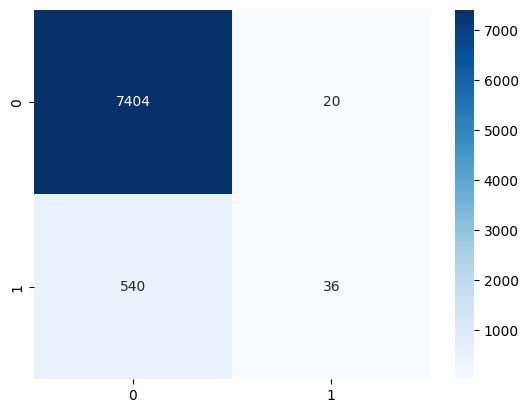

F1 Score: 0.1139


In [48]:
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")


In [49]:
if 'y' in test.columns:
    test = test.drop(columns=['y'])

In [50]:
test = test[train.drop(columns=['y']).columns]

In [51]:
test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
40000,1.706699,-0.191573,3,-0.327048,-0.581096,-0.361914,-0.194562,False,False,False,...,False,True,False,False,False,False,False,False,False,True
40001,0.980682,-0.346546,3,-0.697185,-0.272359,0.637422,0.737360,False,False,False,...,False,True,False,False,False,False,False,False,False,False
40002,0.565816,1.065085,3,-0.731886,-0.581096,0.703312,0.271399,False,False,False,...,False,True,False,False,False,False,False,False,False,False
40003,1.602982,0.785100,3,-0.400305,-0.581096,-0.361914,-0.194562,False,False,False,...,False,True,False,False,False,False,False,False,False,True
40004,-0.886217,-0.168499,3,0.070078,-0.581096,-0.361914,-0.194562,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.084399,-0.154724,17,2.784418,0.036377,-0.361914,-0.194562,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45207,3.158732,0.156599,17,0.775652,-0.272359,-0.361914,-0.194562,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45208,3.262448,1.529315,17,3.362757,0.653849,1.669703,1.203321,False,False,False,...,False,False,False,False,True,False,False,False,True,False
45209,1.706699,-0.208792,17,0.976143,0.345113,-0.361914,-0.194562,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [52]:
test_predictions = model.predict(test)

In [53]:
test_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
test['y'] = test_predictions

In [55]:
test['y']

,y
40000,0
40001,0
40002,0
40003,0
40004,0
...,...
45206,0
45207,0
45208,0
45209,0


In [56]:
test['y'] = test['y'].map({1: 'yes', 0: 'no'})

In [57]:
test['y'].tail()

,y
45206,no
45207,no
45208,no
45209,no
45210,no


In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}


In [60]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           verbose=2)

In [61]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END .max_depth=5, min_samples_split=2, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)

In [62]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


In [63]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_val)
print("F1 Score (Tuned Model):", f1_score(y_val, y_pred_tuned))

F1 Score (Tuned Model): 0.3686868686868687


In [64]:
from sklearn.metrics import accuracy_score

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_tuned)
print("Accuracy (Tuned Model):", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy Percentage:", accuracy_percentage)

Accuracy (Tuned Model): 0.9375
Accuracy Percentage: 93.75


In [65]:
# Export the processed train data to a CSV file
train.to_csv('train_processed.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('train_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_val and y_pred are the true and predicted labels for the validation set
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Yes class): {precision:.2f}")
print(f"Recall (Yes class): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("F1 Score (Tuned Model):", f1_score(y_val, y_pred_tuned))
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.93
Precision (Yes class): 0.64
Recall (Yes class): 0.06
F1-Score: 0.11
F1 Score (Tuned Model): 0.3686868686868687
ROC-AUC: 0.53
